# **Introduction**
Stack overflow is a professional community for developers. They conduct developer surveys every year since 2011. The collected data is available open-source on the web. The Dataset would help us to answer real-world questions with the help of proper analysis. The most popular language that developers use can be found through the analysis. We also can find the developer role which pays the highest salary. The aim of our project is to analyze the 2022 developer surveys datasets from where we collect valuable insights from them.

# **Methodology**

This analysis is going to follow the CRISP-DM methodology, cross-industry process for data mining. CRISP-DM is a robust and well known methodology that provides a structured approach to planning a data mining project. It includes the following processes:



1.  Business understanding
2.  Data understanding
3.  Preparing data
4.  Data modeling
5.  Evaluating results
6.  Deployment


In this project, the survey results will be used to answer the following questions for aspiring data scientists:

1.  What are the most working programming language in 2022?
2.  what are the top jobs in 2022? 
3.  What is the proportion of developers who work remotely?
4.  What are the most learning course certification in 2022?

A summary of the finding is available at this blogpost: https://medium.com/@emna.krichen_72178/2022-stackoverflow-survey-analysis-6203b4edb1e3

In [110]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [111]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter
# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# **Gather Data**


In [112]:
%%pycodestyle

# Reading Stackoverflow survey data 2022
#Data source: 2022 in https://insights.stackoverflow.com/survey

df_stack = pd.read_csv('/content/survey_results_public.csv')

INFO:pycodestyle:4:1: E265 block comment should start with '# '
INFO:pycodestyle:7:1: W391 blank line at end of file


In [113]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      14799 non-null  int64  
 1   MainBranch                      14799 non-null  object 
 2   Employment                      14648 non-null  object 
 3   RemoteWork                      12295 non-null  object 
 4   CodingActivities                12283 non-null  object 
 5   EdLevel                         14631 non-null  object 
 6   LearnCode                       14624 non-null  object 
 7   LearnCodeOnline                 10582 non-null  object 
 8   LearnCodeCoursesCert            5170 non-null   object 
 9   YearsCode                       14578 non-null  object 
 10  YearsCodePro                    10858 non-null  object 
 11  DevType                         12636 non-null  object 
 12  OrgSize                         

In [114]:
# Sample 2022 Data
df_stack.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


The data is very challenging, many columns contain many values which make it hard to analyze

# **Assess Data**

In [115]:
df_stack.shape

(14799, 79)

In [116]:
df_stack.Country.nunique()

152

There are 73268 developers who respond to this survey, comng from 180 country.

In this project, we will focus on only few features Which we hypothesize that they are strongly related to our business questions.

In [117]:
df = df_stack[['MainBranch', 'RemoteWork','LearnCode', 'LearnCodeOnline','LearnCodeCoursesCert','YearsCode','DevType','Country','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','Age']]

In [118]:
df.describe()

,MainBranch,RemoteWork,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,DevType,Country,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,Age
count,14799,12295,14624,10582,5170,14578,12636,14661,14568,9385,14494
unique,6,3,528,3017,155,52,2855,152,7528,1484,8
top,I am a developer by profession,Fully remote,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Udemy,10,"Developer, full-stack",United States of America,HTML/CSS;JavaScript;TypeScript,.NET,25-34 years old
freq,11479,5336,771,198,950,1167,1526,3022,226,1682,6236


In [119]:
#check columns with missing values
df.isnull().sum()

MainBranch                   0
RemoteWork                2504
LearnCode                  175
LearnCodeOnline           4217
LearnCodeCoursesCert      9629
YearsCode                  221
DevType                   2163
Country                    138
LanguageHaveWorkedWith     231
MiscTechHaveWorkedWith    5414
Age                        305
dtype: int64

In [120]:
df.isnull().sum()/df.shape[0]

MainBranch                0.000000
RemoteWork                0.169201
LearnCode                 0.011825
LearnCodeOnline           0.284952
LearnCodeCoursesCert      0.650652
YearsCode                 0.014933
DevType                   0.146159
Country                   0.009325
LanguageHaveWorkedWith    0.015609
MiscTechHaveWorkedWith    0.365836
Age                       0.020610
dtype: float64

There are 10 columns that have missing values. Here is the strategy that I will have for filling each of the column

**Fill remaining missing values**

*I will fill categorical column with their mode.*

In [121]:
#Age is a categorical column
df.Age = df.Age.fillna(df.Age.mode()[0])

<ipython-input-121-28390f81967c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age = df.Age.fillna(df.Age.mode()[0])


'RemoteWork', 'LearnCode', 'LearnCodeOnline', 'MiscTechHaveWorkedWith', 'LanguageHaveWorkedWith', 'DevType' and 'LearnCodeCoursesCert' are informative columns, I don't think that it is a good choice to fill them by their mode. So to clean the null values, I will fill them by "None"

In [122]:
for col in ['RemoteWork', 'LearnCode', 'LearnCodeOnline', 'MiscTechHaveWorkedWith', 'LanguageHaveWorkedWith', 'DevType','LearnCodeCoursesCert']:
    df[col] = df[col].fillna('None')

<ipython-input-122-0c4561d2be2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('None')


*YearsCode is supposed to be an integer value, so I suppose the missing value means zero*



In [123]:
#YearsCode is supposed to be an integer value, so I will fill missing value by zero
df.YearsCode = df.YearsCode.fillna(0)


<ipython-input-123-0d61a768ae78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.YearsCode = df.YearsCode.fillna(0)


There are only few rows where Country has missing values, we will drop these rows

In [124]:
df.dropna(subset=['Country'], inplace=True)

<ipython-input-124-8e045a17d72a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Country'], inplace=True)


 We test if every thing is cleaned

In [125]:
df.isnull().sum()

MainBranch                0
RemoteWork                0
LearnCode                 0
LearnCodeOnline           0
LearnCodeCoursesCert      0
YearsCode                 0
DevType                   0
Country                   0
LanguageHaveWorkedWith    0
MiscTechHaveWorkedWith    0
Age                       0
dtype: int64

# **1.What are the most working programming language?**

In [126]:
df.LanguageHaveWorkedWith

1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
5                                                  C++;Lua
                               ...                        
14792                       HTML/CSS;JavaScript;Python;SQL
14793    Assembly;Bash/Shell;Clojure;HTML/CSS;Java;Java...
14794    Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;Pyt...
14796                   Assembly;Bash/Shell;C;C++;Ruby;SQL
14797    Bash/Shell;C;C#;C++;HTML/CSS;JavaScript;Lua;Pe...
Name: LanguageHaveWorkedWith, Length: 14661, dtype: object

We notice that developers choose many programming language at the same time, Also we notice that there are missing values, we hypothesize that maybe the developer is a new starter and he still doesn't know which language he prefers.

In [127]:
# develop a function that will be used for plotting bar graphs per column
def plot_column_count(column, plot_title, df=df):
    """ Function for plotting a bar graph for the given column
    
    INPUT - column -  
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per column of interest
            
    """
    count_values = column.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

    # display the top 10
    (count_values[:10]/df.shape[0]).plot(kind="bar");
    plt.title(plot_title);

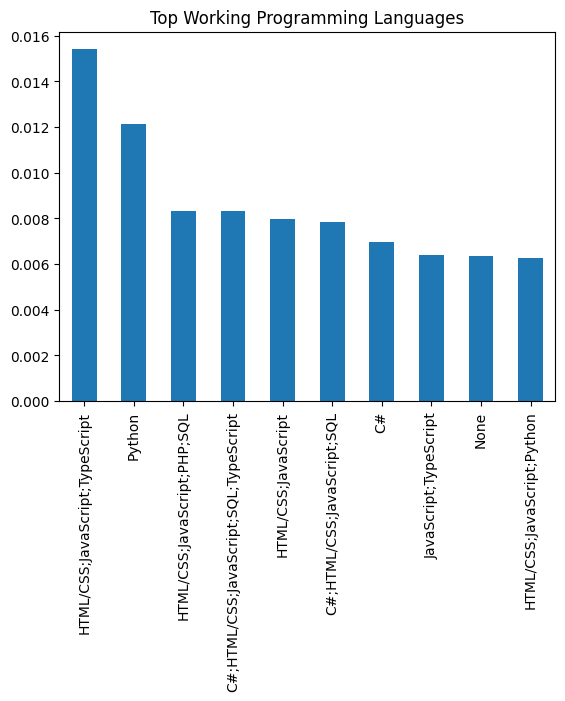

In [128]:
plot_column_count(df.LanguageHaveWorkedWith, "Top Working Programming Languages")

The graph depicts that the most pefered language is Javascript followed by Python then Java. But as the format of this column is messy, so we  we need to clean it by splitting this column so that we can analyse languages one by one.

In [129]:
# the format of programming languages needs to be cleaned up, this is because for developers using multiple languages, 
# those languages are concatenated with ;

In [130]:
def split_column(column, df=df):
    """ Function for splitting multi value columns into multiple values 
    
    INPUT - column -  
            plot_title - string - plot_title
    
    OUTPUT - unique_values - dict of separated unique values associated with their count
            
    """
    unique_values = {}
    multi_value_column = df[df[column.name].notnull()]
    # split the languages on ;
    for language_set in multi_value_column[column.name].apply(lambda row: str(row).split(';')):
        for language in language_set:
            if language not in unique_values.keys():
                unique_values[language] = 1
            else:
                unique_values[language] += 1
    return unique_values

In [131]:
unique_worked_languages = split_column(df['LanguageHaveWorkedWith'])

In [132]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

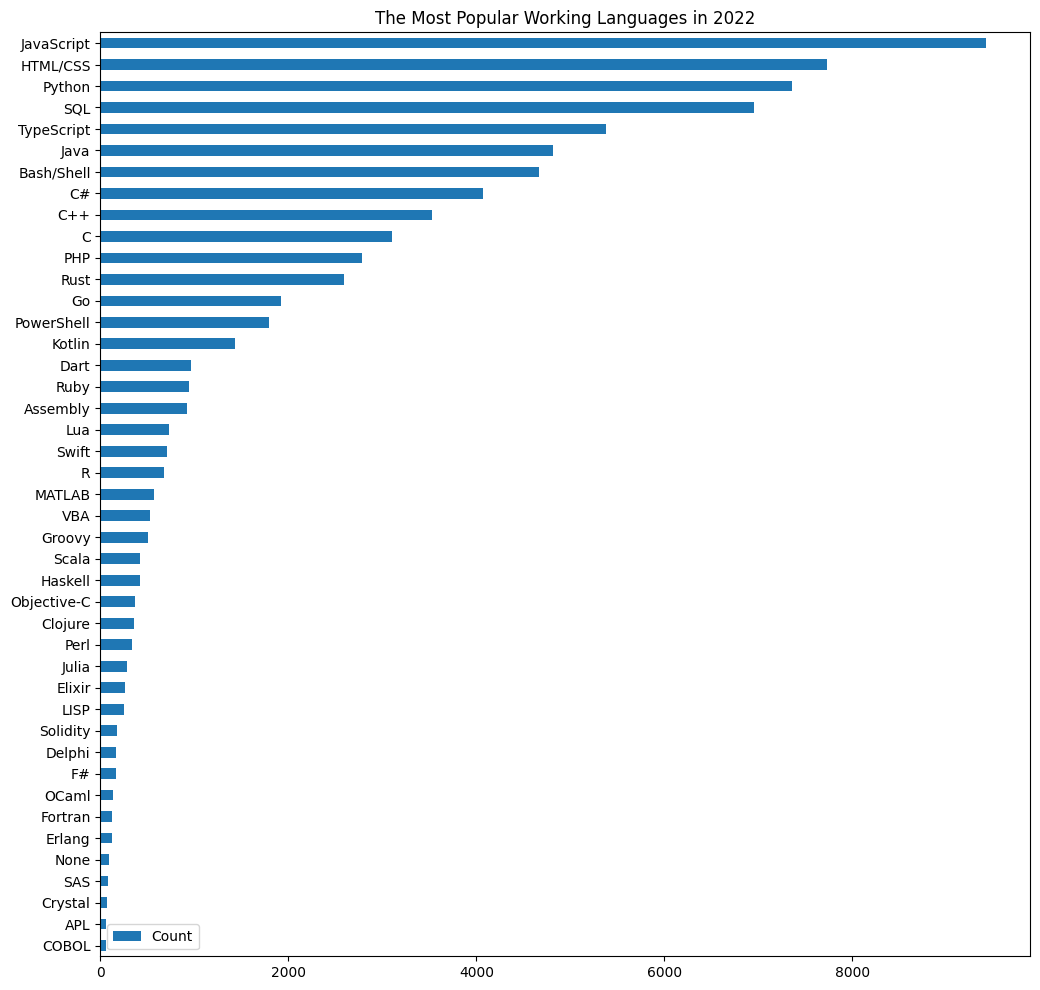

In [133]:
# let make a bar graph
plot_dimension_count(unique_worked_languages,'The Most Popular Working Languages in 2022')

When we splitted the language programming column, values' distribution slightly changed. According to Stack Overflow's 2022 Developer Survey, JavaScript currently stands as the most commonly-used language in the world, followed by HTML/CSS, Python and SQL.

# **2. What are the top jobs in 2022**

In [134]:
df.DevType.value_counts()

None                                                                                                                                                                                                                                 2025
Developer, full-stack                                                                                                                                                                                                                1526
Developer, back-end                                                                                                                                                                                                                  1169
Developer, front-end                                                                                                                                                                                                                  447
Developer, front-end;Developer, full-stack;Developer, back-end  

In [135]:
unique_job = split_column(df['DevType'])

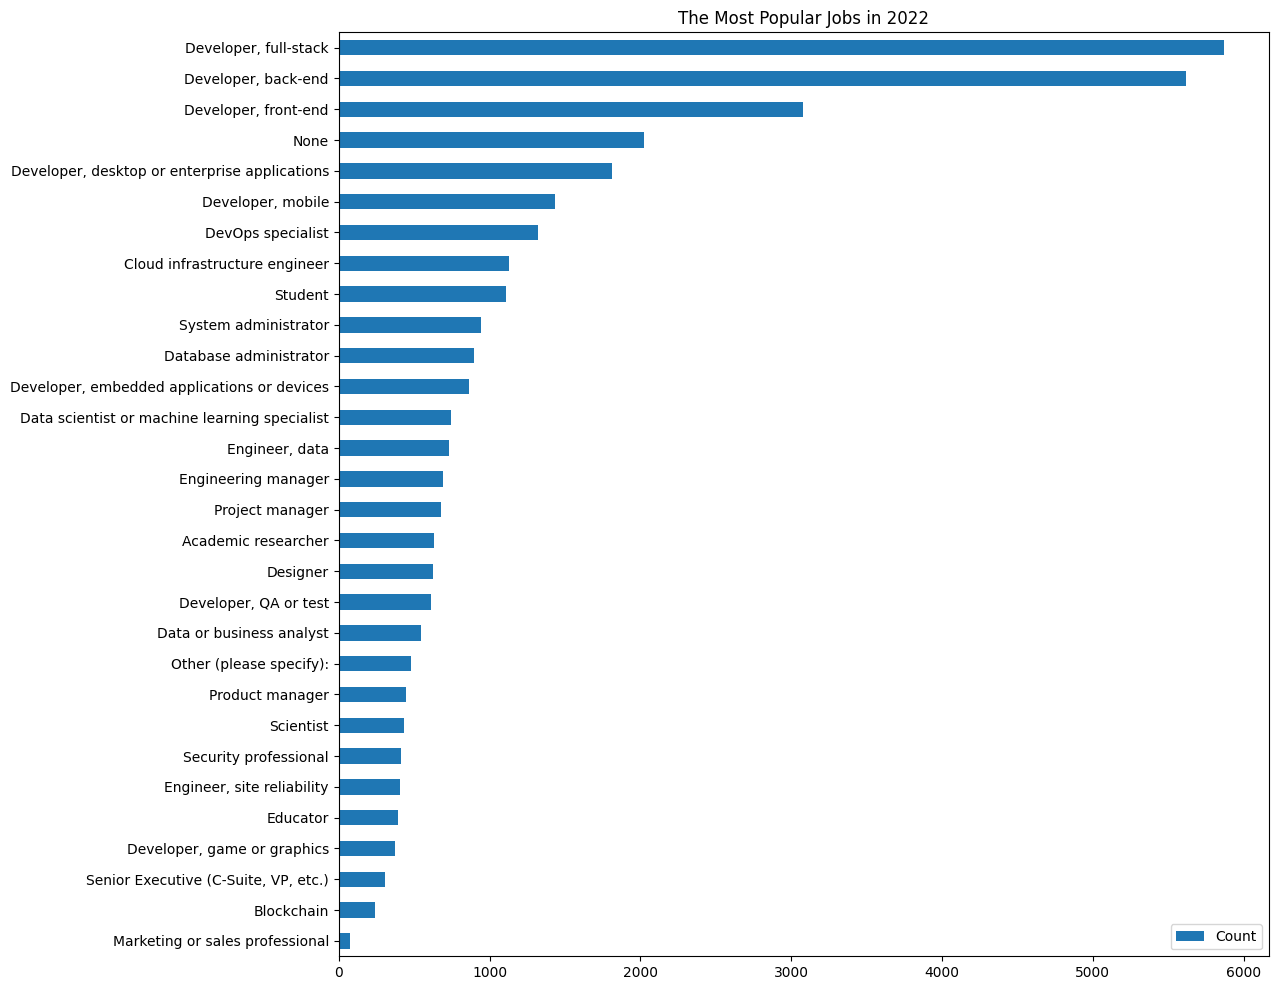

In [136]:
plot_dimension_count(unique_job,'The Most Popular Jobs in 2022')

The most In-Demand Developer-Job are developer-full stack, then comes the developer back-end, and after the developer front-end.


###3. What is the proportion of developers who work remotely? ###

In [137]:
df['RemoteWork'].value_counts()/df['RemoteWork'].count()

Fully remote                            0.363891
Hybrid (some remote, some in-person)    0.349294
None                                    0.161449
Full in-person                          0.125367
Name: RemoteWork, dtype: float64

In 2022, 36% of developers work fully romotely, 34% choose to work in hybrid, whereas only 12% work fully in person.


# **4. What are the top learning course certification in 2022?**

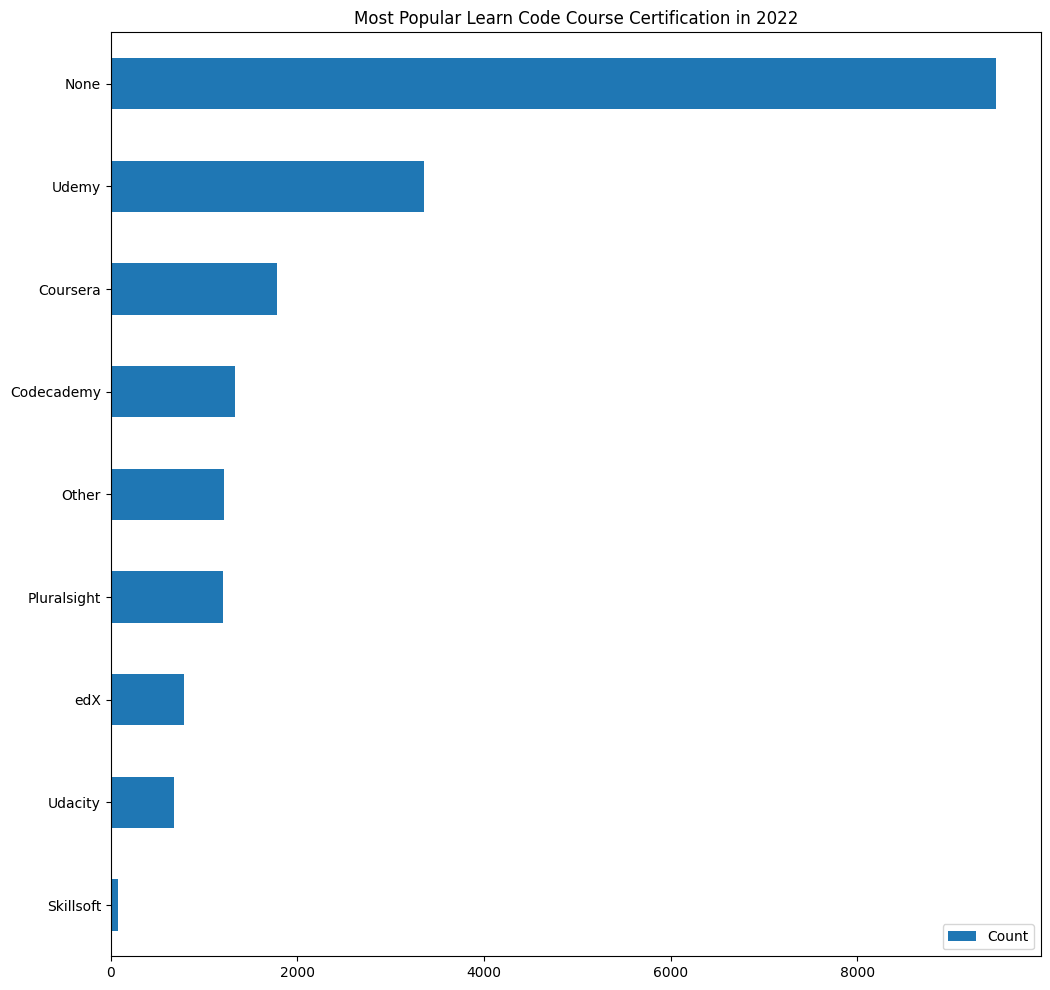

In [138]:
unique_courseCert = split_column(df['LearnCodeCoursesCert'])
plot_dimension_count(unique_courseCert,'Most Popular Learn Code Course Certification in 2022')

Most of responses do not include enough information about their online certification. But for those who succeffully answered, Udemy is ranked the top learning course in demand, Coursera comes in second place, followed by pluralsight and then codeacademy. I guess the cost of certification hightly influeces this ranking

**Conclusion**
During this Udacity project from StackOverflow data, we worked with data coming from a survey that collects 73,268 entries.

We explored the StackOverflow’s Dataset which records the review of developers about their job, education, career etc..

Our focus during this project was on answering the following questions:


1.    What are the most working programming language in 2022?
2.    what are the top jobs in 2022?
3.    What is the proportion of developers who work remotely?
4.    What are the most learning course certification in 2022?



We began this project by first exploring, cleaning the data, before proceeding to find answers to our primarily driven queries.

* Q1: We have found that Javascript is the most demanding 
programming language.
* Q2: We have found that the full stack developer is the top job of 2022.
* Q3: 70% of developers work in hybrid or remotely.
* Q4: we found out that most developers got udemy certification or coursera certification.


Overall, I found this project challenging, mainly due to the structure of the data that needs a further investigation to be better analysed.


**Further Improvements and Experimentation**

Due to time reasons, I couldn't get a chance to better clean the data. For example, all columns that contains multiple values should be divided into sub columns. This step will allow for example to answer which are the top programming language associated to each job? Does the online certification affect the choice of working remotely? 